# Explore here

In [1]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from math import ceil
from pickle import dump

In [2]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
raw_df = pd.read_csv(URL)

| Feature Name | Description | 
| ----- | ----- | 
| **Pregnancies** | Number of pregnancies of the patient | 
| **Glucose** | Plasma glucose concentration 2 hours after an oral glucose tolerance test | 
| **BloodPressure** | Diastolic blood pressure (measured in mm Hg) | 
| **SkinThickness** | Triceps skin fold thickness (measured in mm) | 
| **Insulin** | 2-hour serum insulin (measured in mu U/ml) | 
| **BMI** | Body mass index | 
| **DiabetesPedigreeFunction** | Diabetes Pedigree Function | 
| **Age** | Age of patient | 
| **Outcome** | Class variable (0 or 1), being 0 negative in diabetes and 1 positive | 

In [3]:
raw_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
raw_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
for column, data in raw_df.items():
    print(f'{column:15}: {(data==0).sum()}')

Pregnancies    : 111
Glucose        : 5
BloodPressure  : 35
SkinThickness  : 227
Insulin        : 374
BMI            : 11
DiabetesPedigreeFunction: 0
Age            : 0
Outcome        : 500


In [58]:
clean_df = raw_df.copy()
clean_df = clean_df[clean_df.BloodPressure!=0]
clean_df = clean_df[clean_df.Glucose!=0]
clean_df = clean_df[clean_df.BMI!=0]



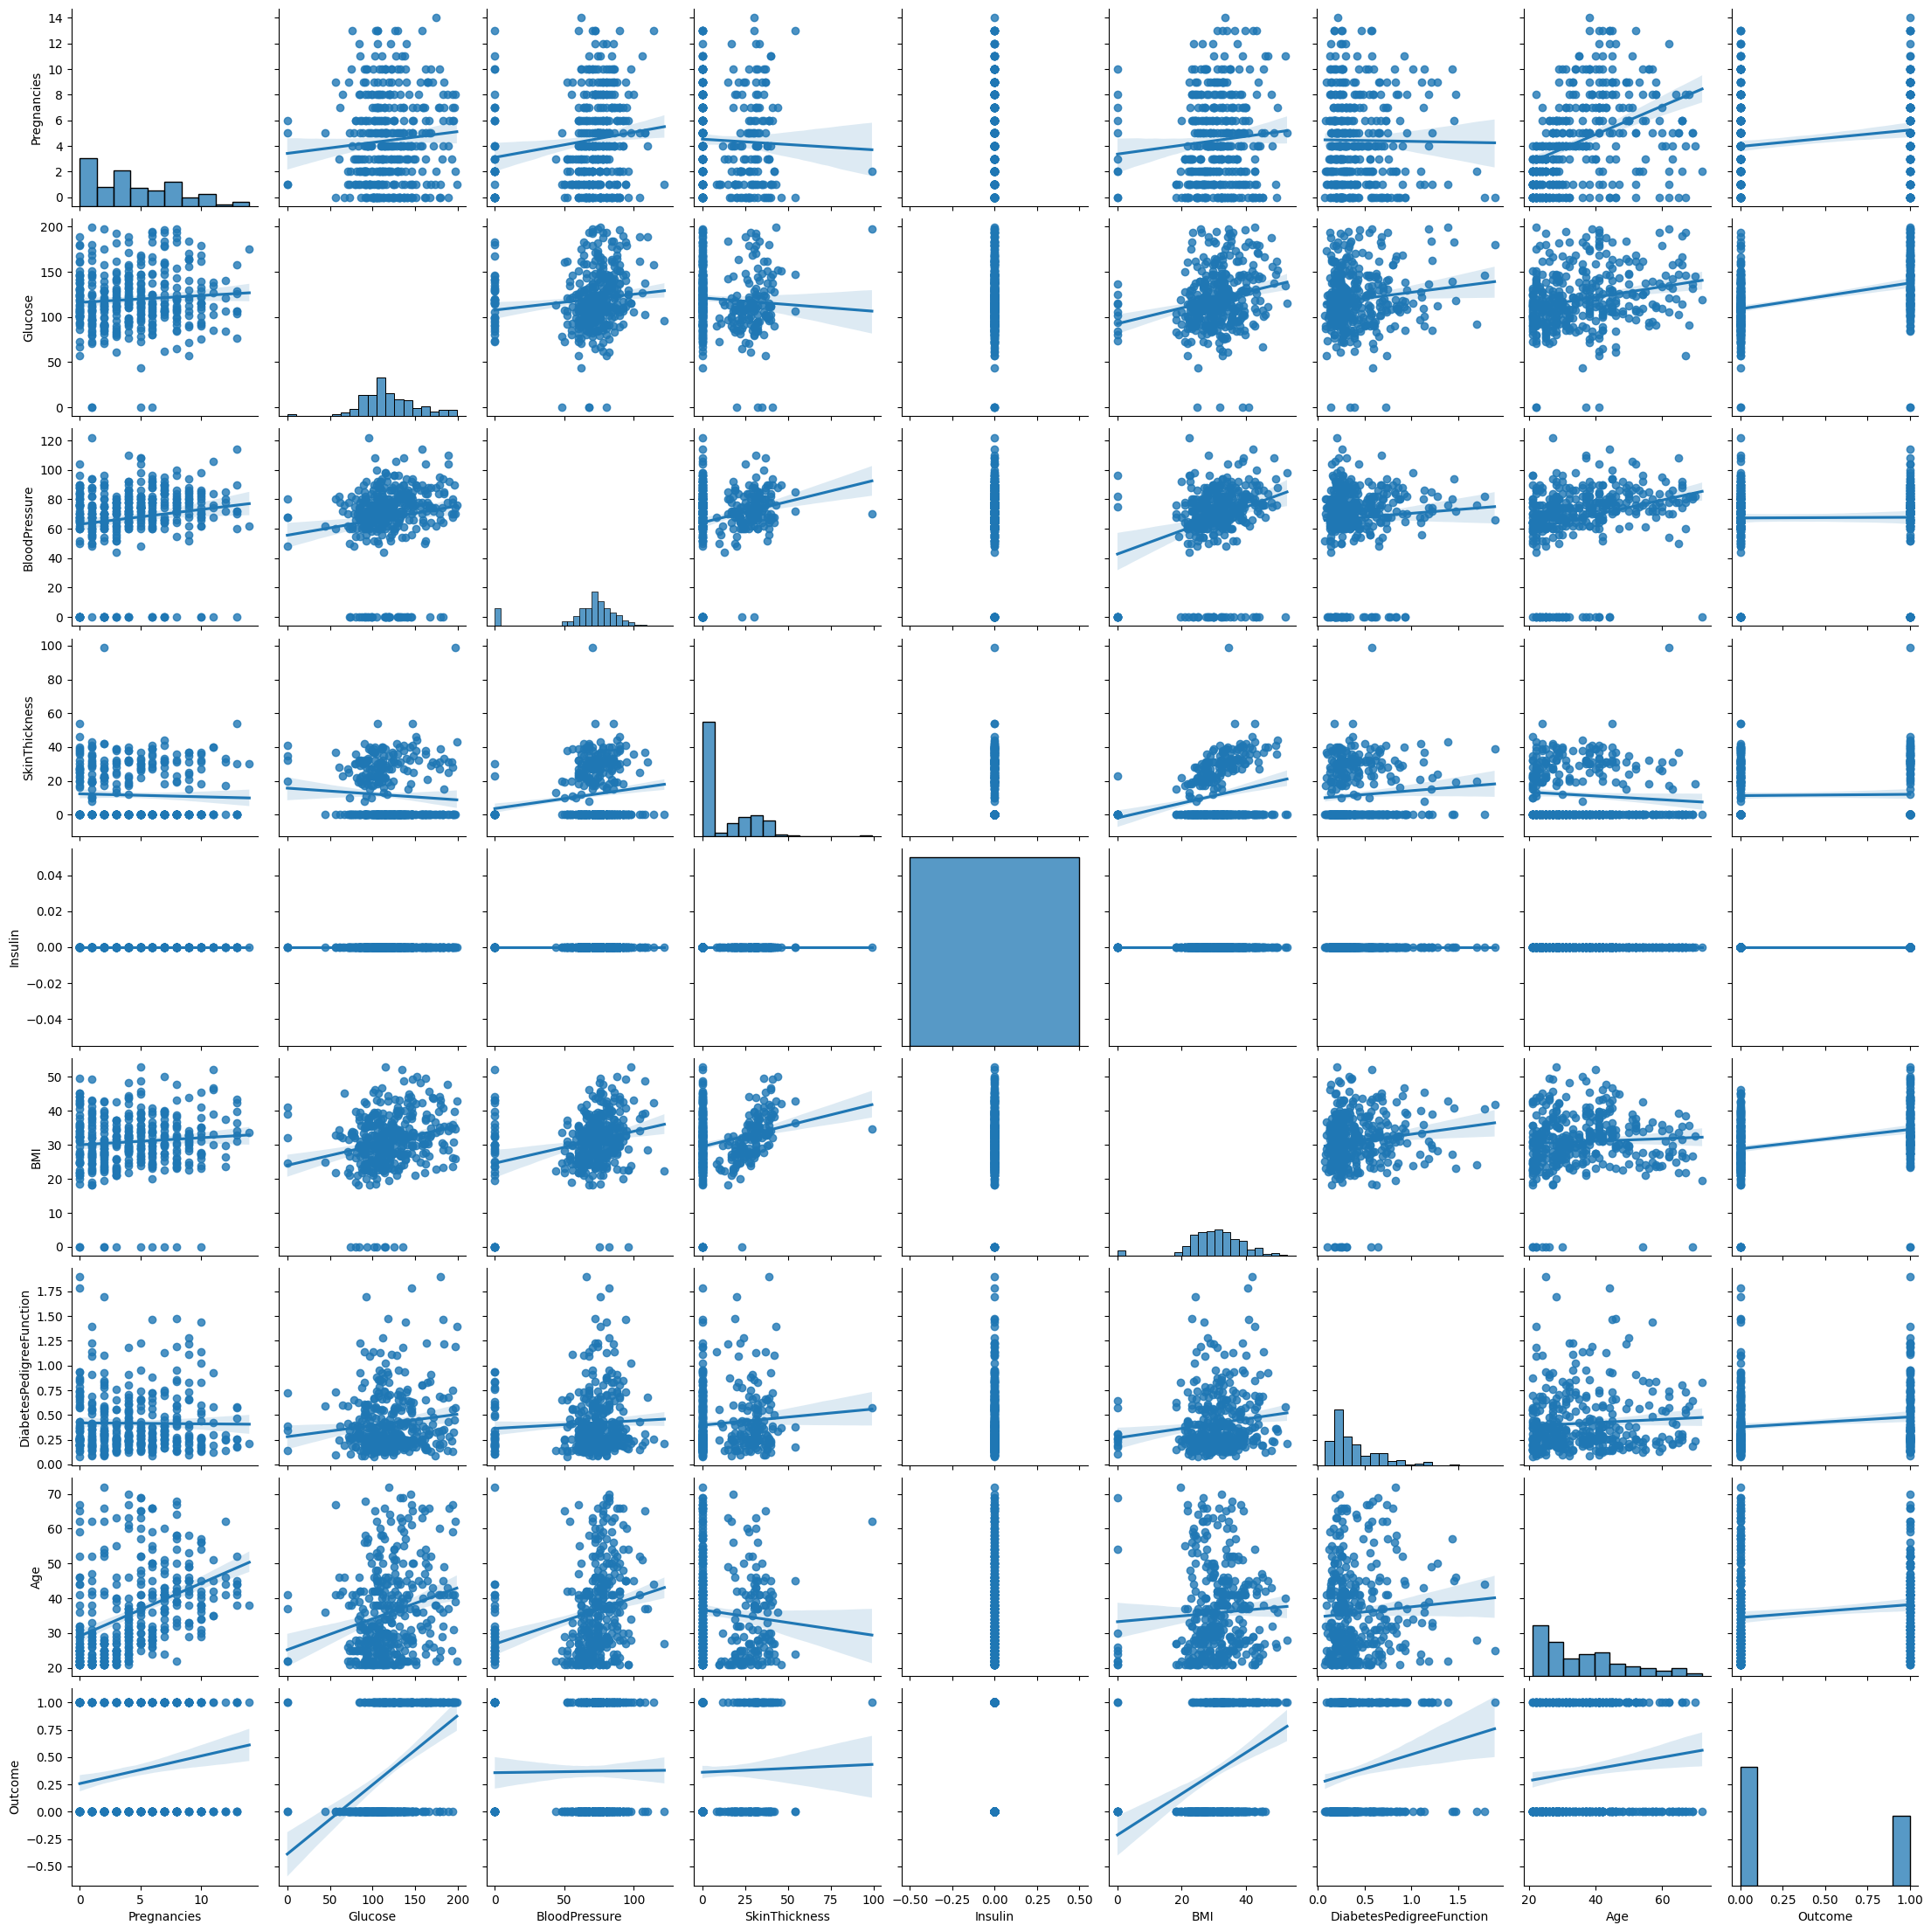

In [ ]:
sns.pairplot(clean_df[clean_df.Insulin==0], kind='reg')
plt.show()

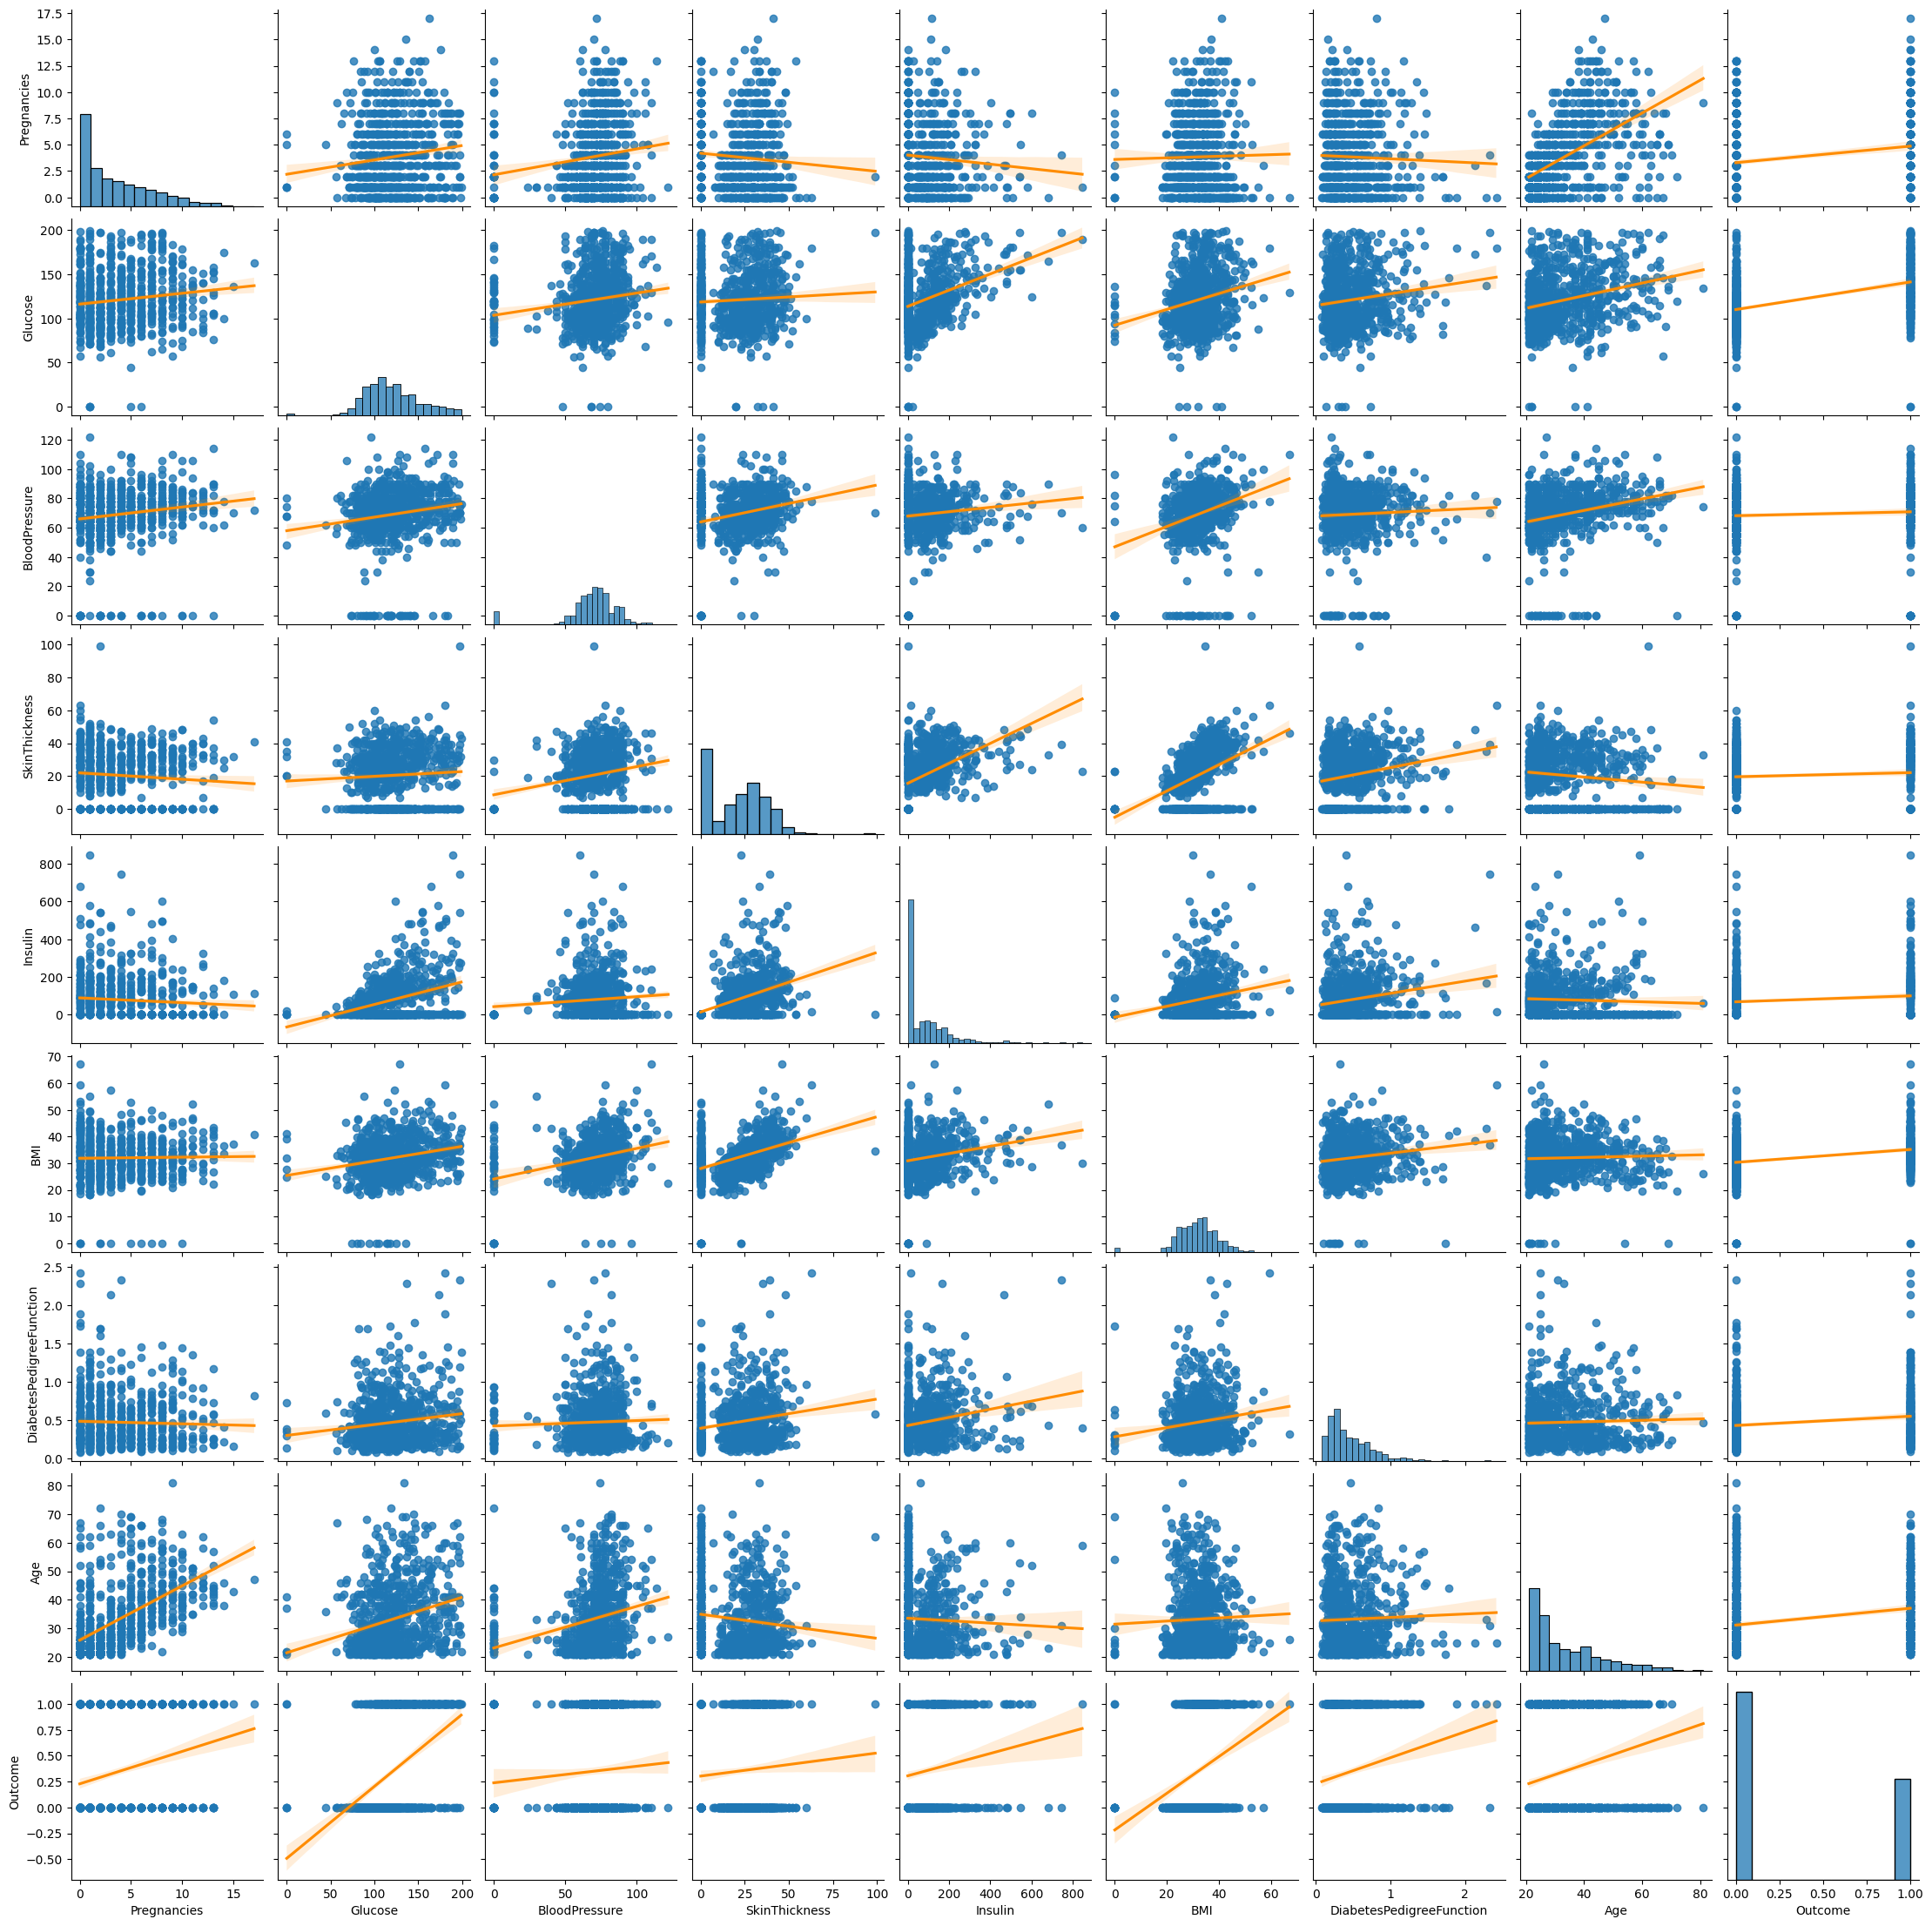

In [7]:
sns.pairplot(raw_df, kind='reg', plot_kws={'line_kws':{'color':'darkorange'}})
plt.show()

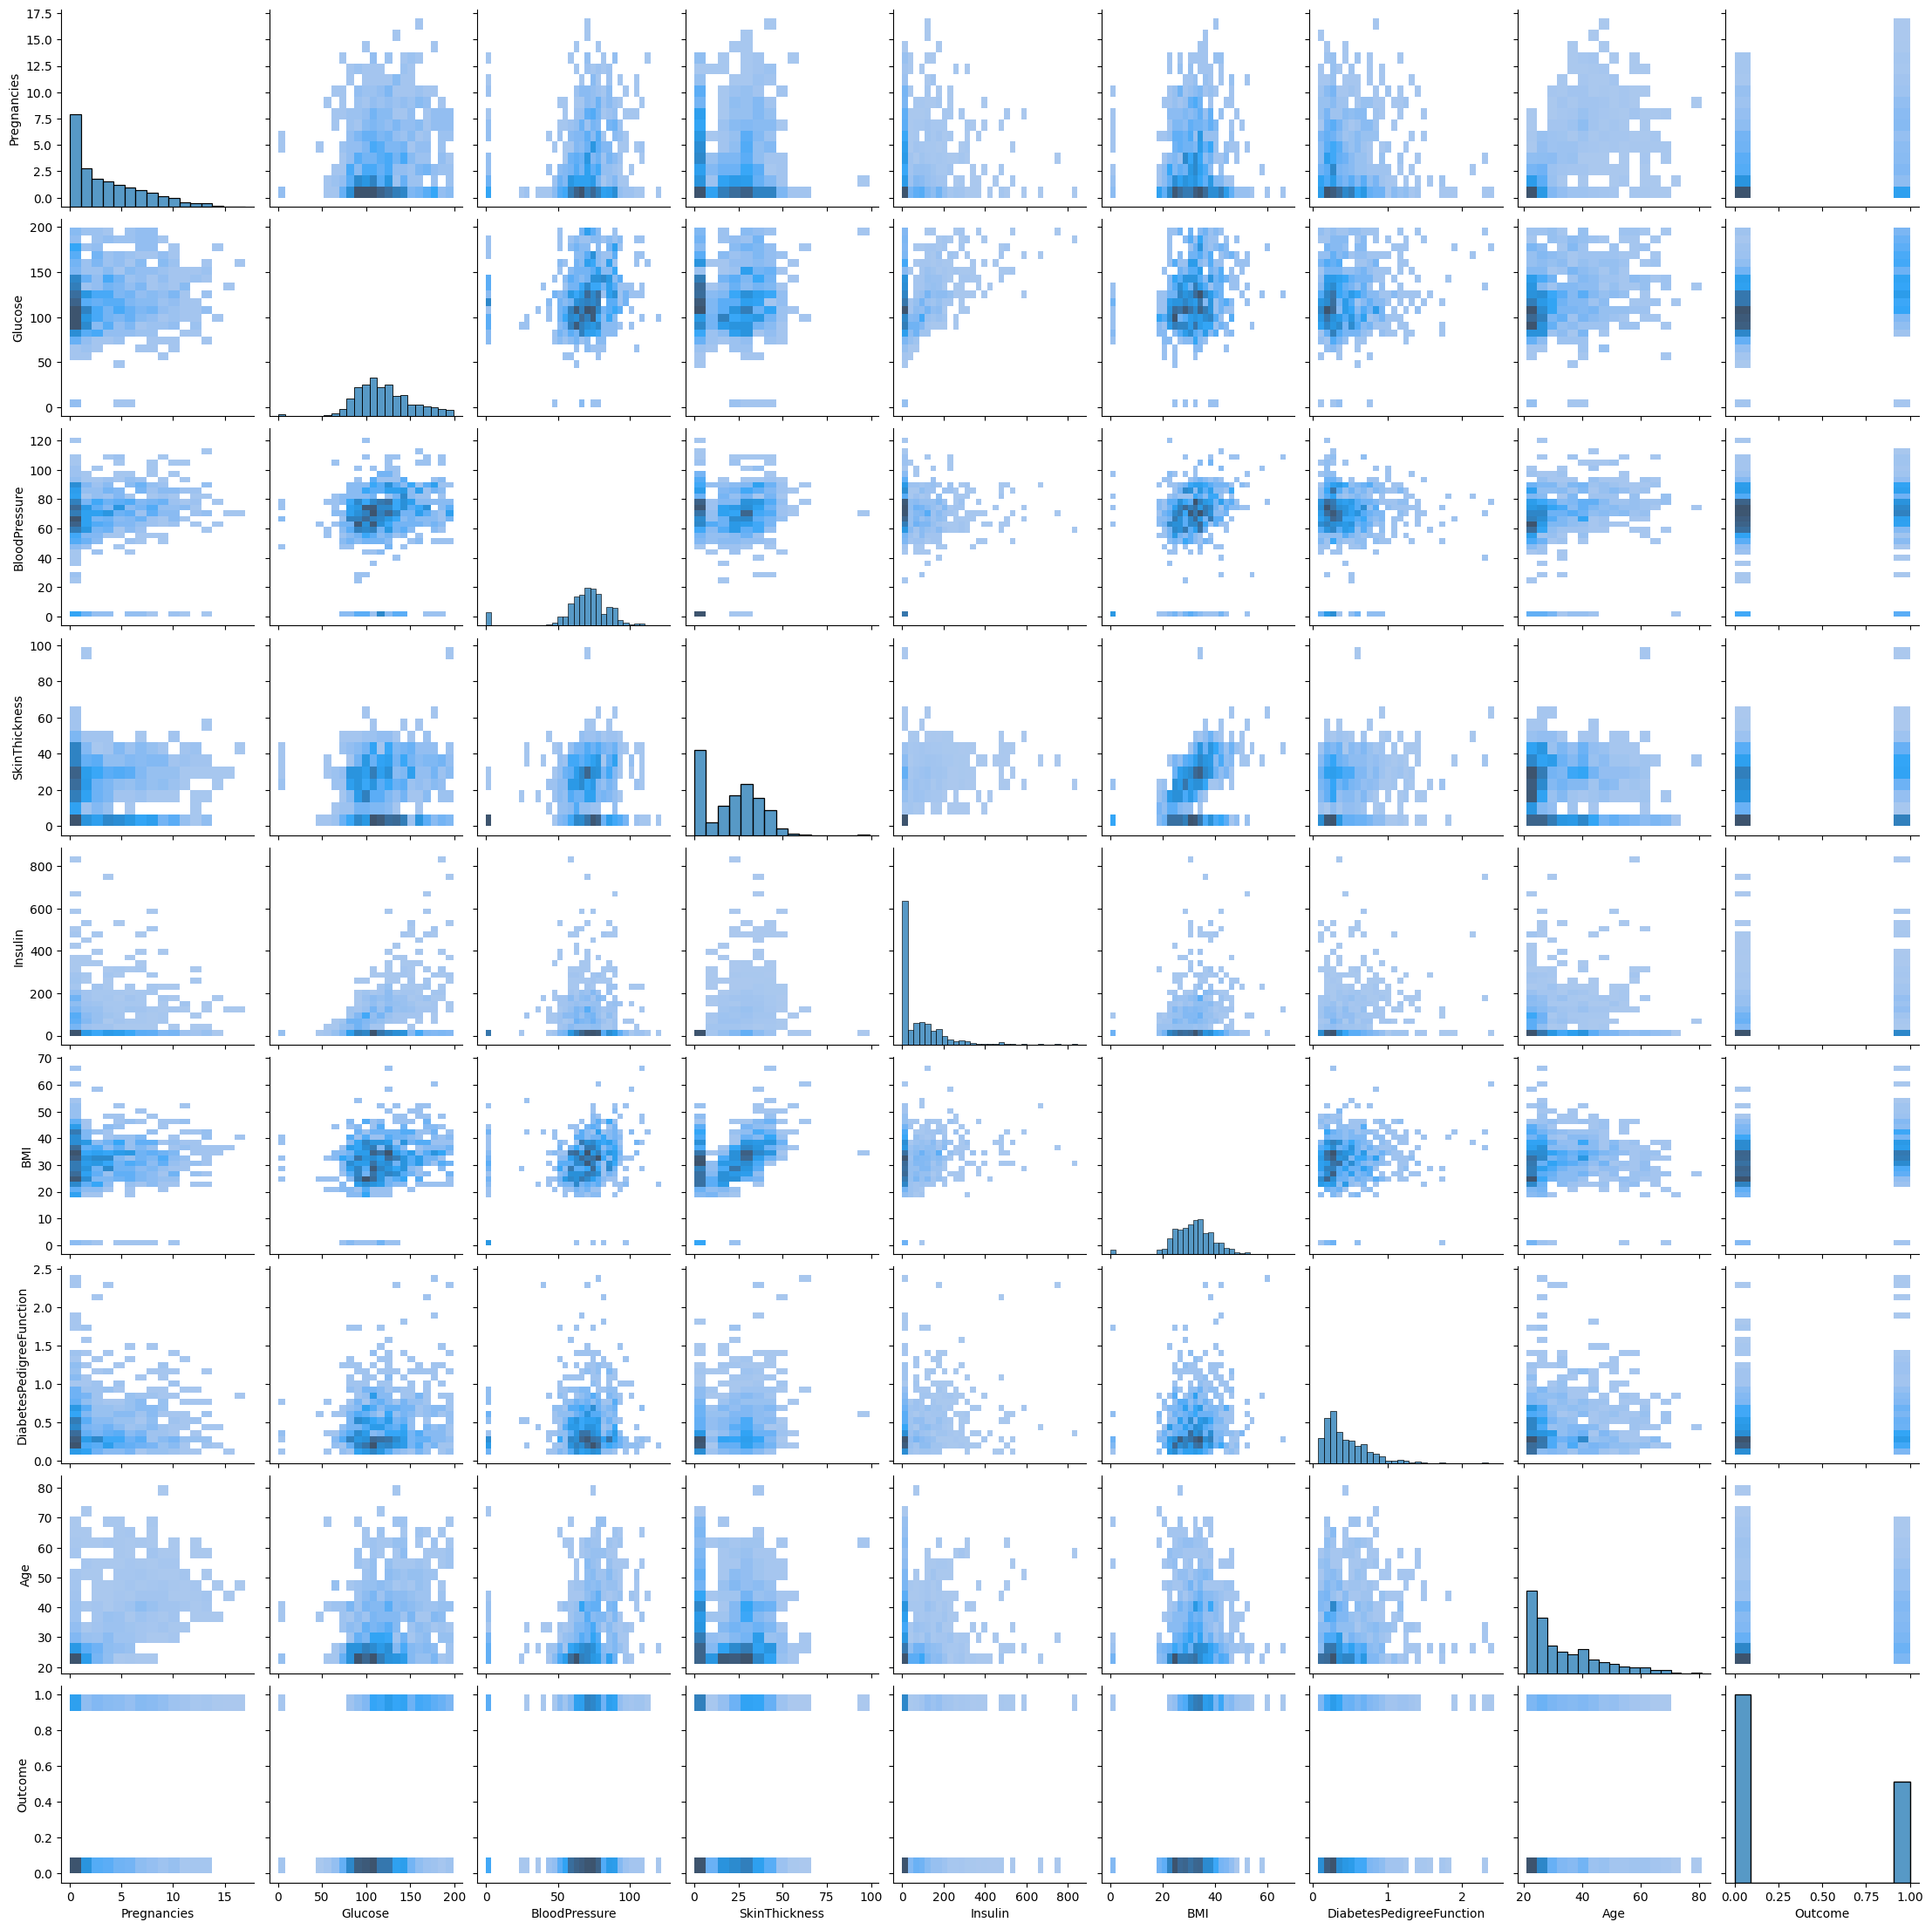

In [8]:
sns.pairplot(raw_df, kind='hist')
plt.show()

<Axes: >

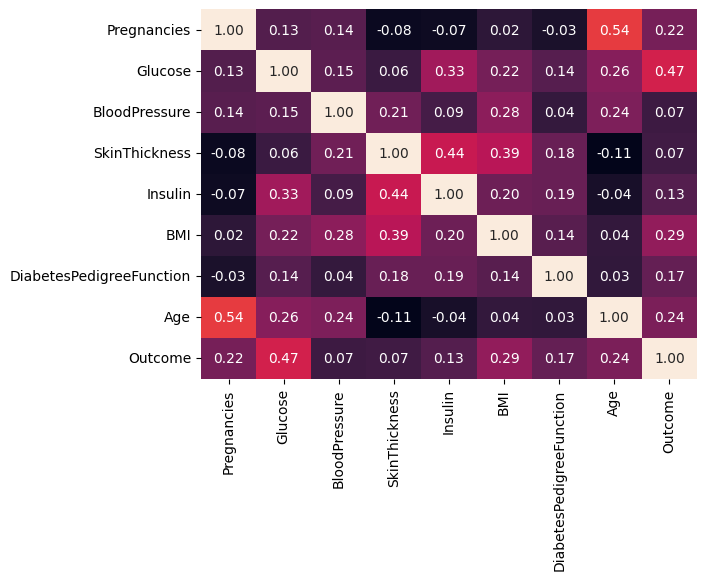

In [ ]:
sns.heatmap(raw_df.corr(), annot=True, fmt='.2f', cbar=False)
plt.show()

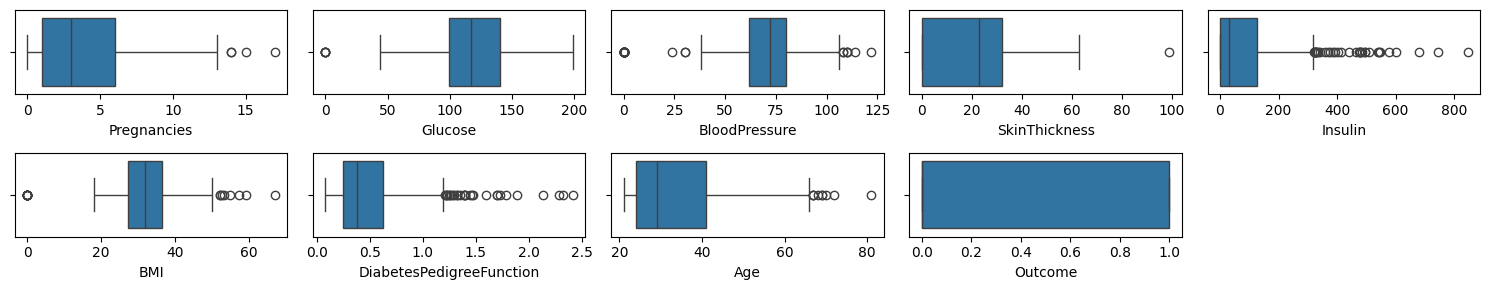

In [19]:
nplots = len(clean_df.columns)

ncols = 5
nrows = ceil(nplots/ncols)
sizein = 3

fig = plt.figure(figsize=(sizein*ncols, sizein*nrows*0.5))
ax=[]

for i, col in enumerate(clean_df.columns):
    new_plot = fig.add_subplot(nrows, ncols, i+1)
    ax.append(new_plot)
    
    sns.boxplot(clean_df, x=col, ax=ax[i])
    
plt.tight_layout()
plt.show()

In [59]:
x = clean_df.drop('Outcome', axis=1)
y = clean_df.Outcome

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(x_train,y_train)


y_predict = model.predict(x_test)
score = accuracy_score(y_test, y_predict)
print(f'accuracy = {score}')



accuracy = 0.7513812154696132


In [25]:
x = raw_df.drop('Outcome', axis=1)
y = raw_df.Outcome

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(x_train,y_train)


y_predict = model.predict(x_test)
score = accuracy_score(y_test, y_predict)
print(f'accuracy = {score}')

accuracy = 0.7083333333333334
